In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rajeev\AppData\Local\Temp\ipykernel_11160\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
import missingno as msno

<Axes: >

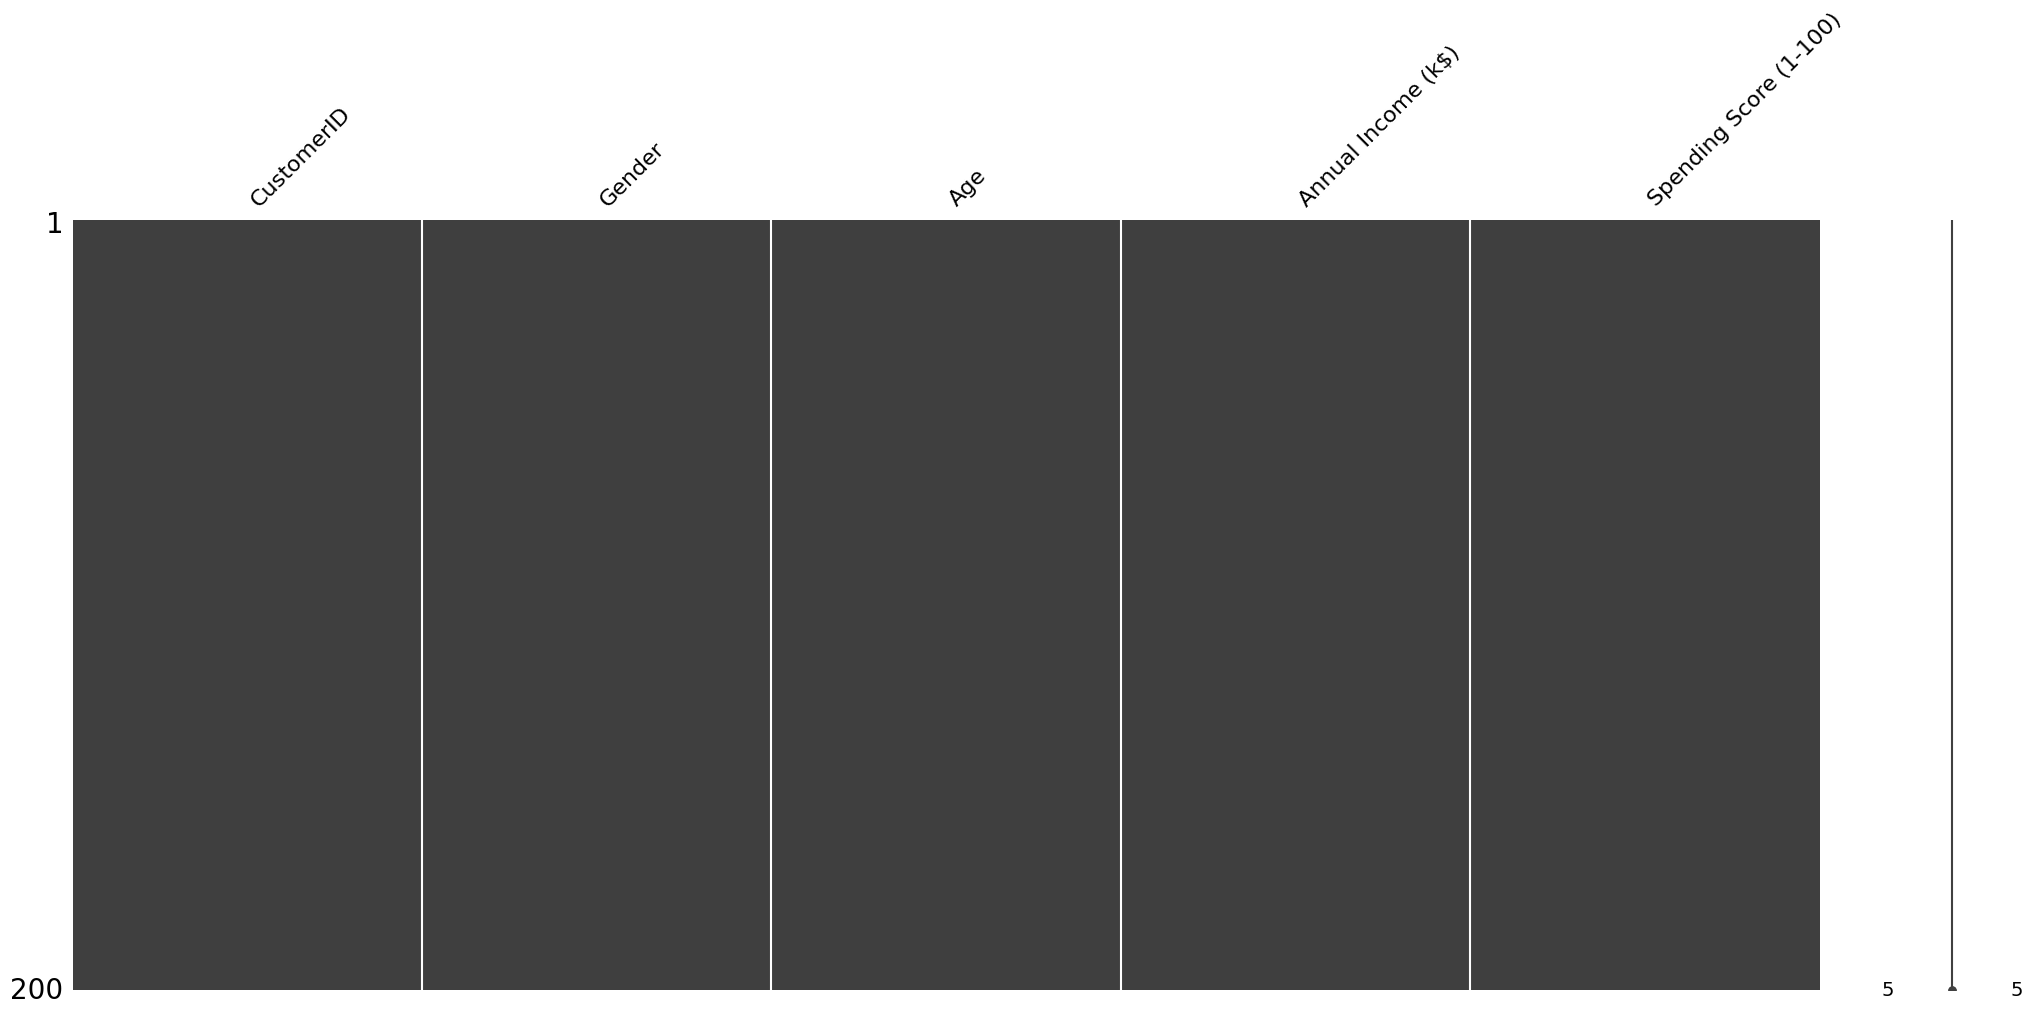

In [8]:
msno.matrix(data)

## Data Visualization and EDA

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

c:\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


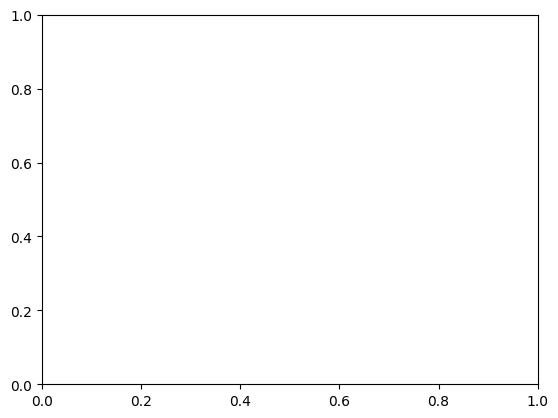

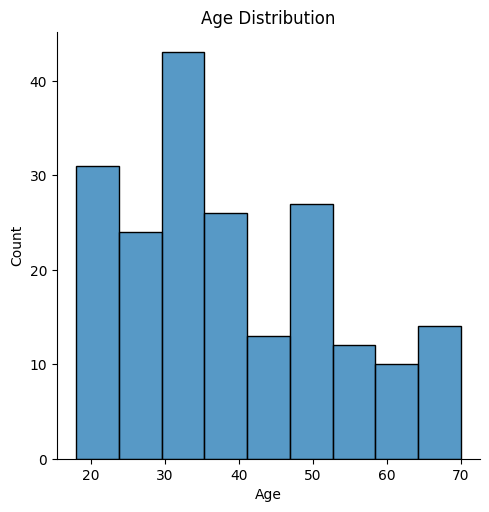

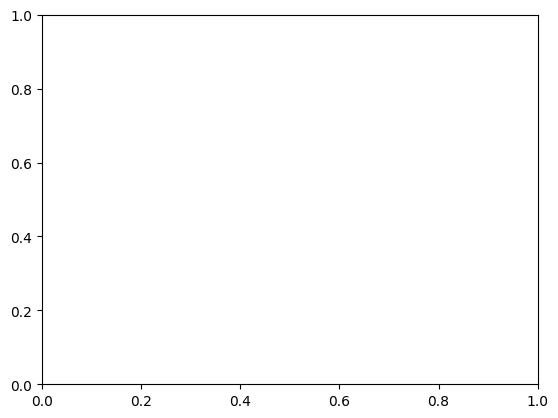

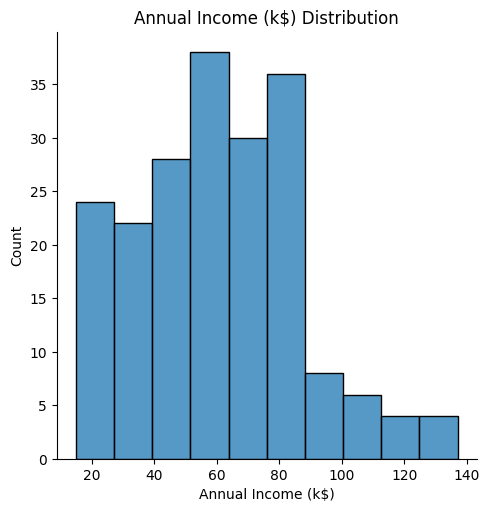

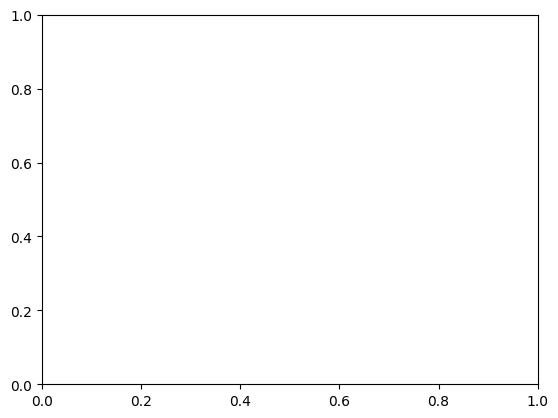

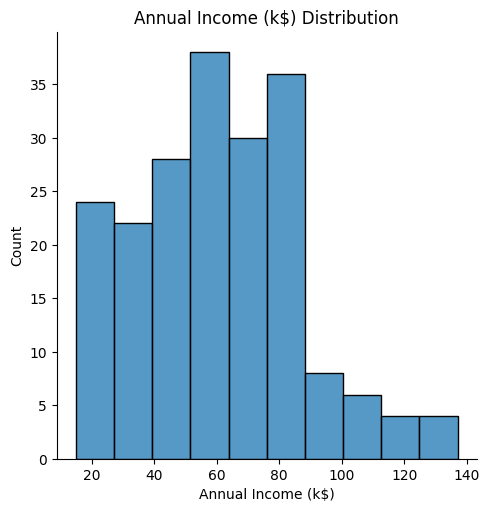

In [10]:
plt.subplots(1,1)
sns.displot(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplots(1,1)
sns.displot(data['Annual Income (k$)'], ax=plt.gca())
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

plt.subplots(1,1)
sns.displot(data['Annual Income (k$)'], ax=plt.gca())
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Gender Distribuition')

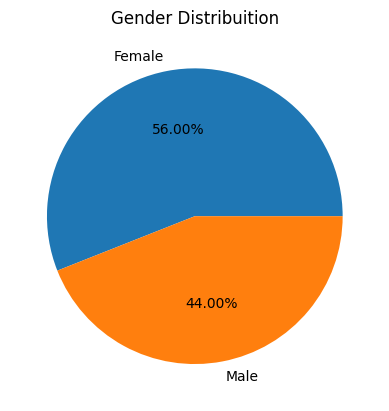

In [11]:
df = data.groupby('Gender').size()
df.plot(kind="pie",autopct="%.2f%%")
plt.title('Gender Distribuition')

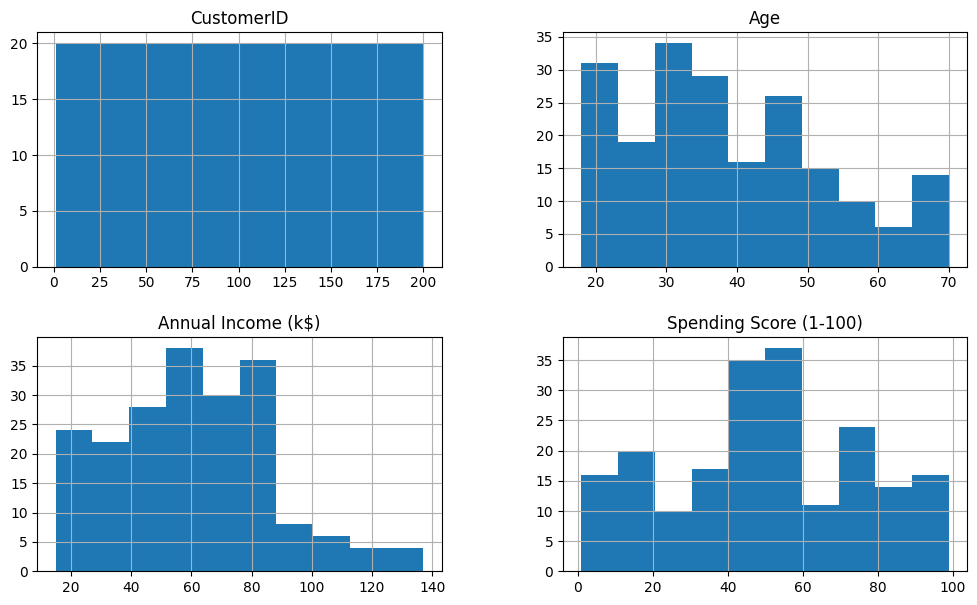

In [12]:
data.hist(figsize  = (12,7))
plt.show()

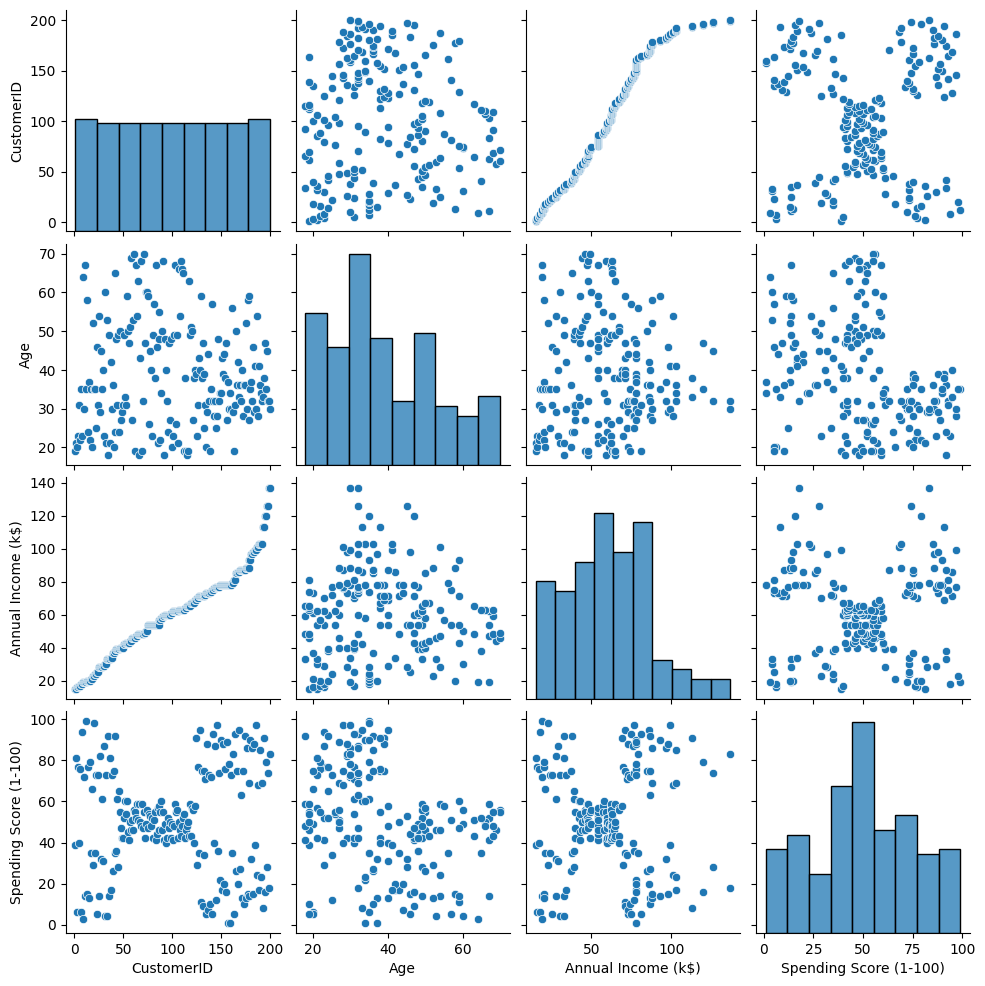

In [13]:
sns.pairplot(data)
plt.show()

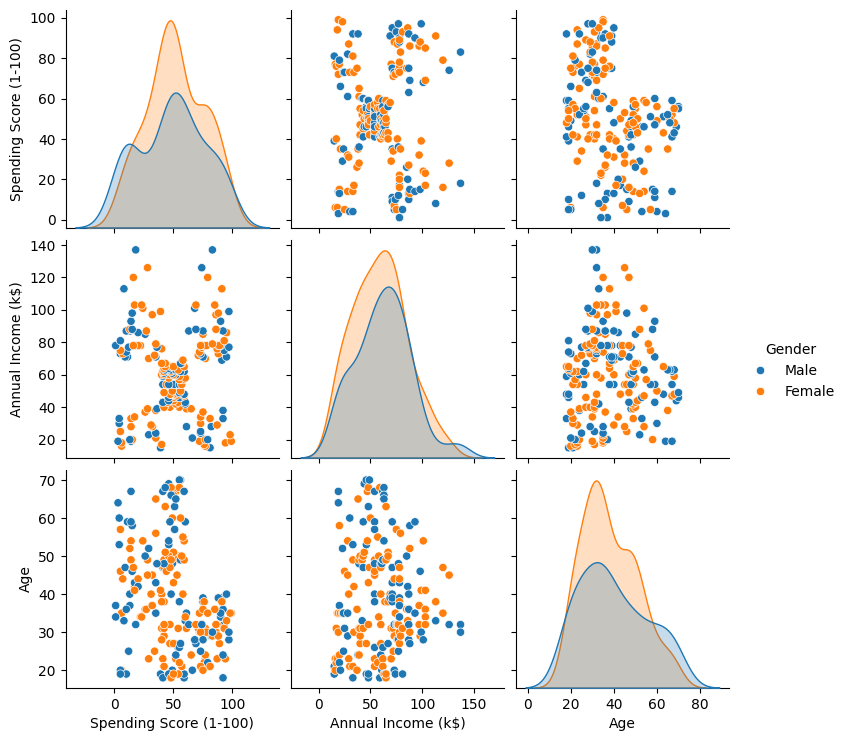

In [14]:
sns.pairplot(data, vars= ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue="Gender")

Text(0.5, 1.0, 'Distribution of Age')

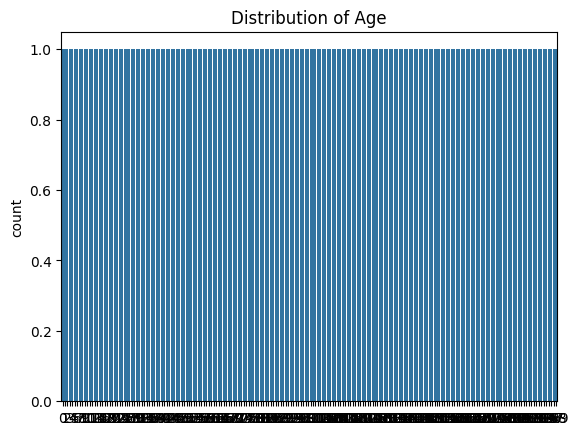

In [15]:
sns.countplot(data['Age'])
plt.title("Distribution of Age")